In [32]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from more_itertools import random_combination, flatten, pairwise,chunked

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/smsx/.cache/pypoetry/virtualenvs/dhdrnet-KNUoFHXm-py3.8/lib/python3.8/site-packages/colour/utilities/verbose.py:235: ColourWarning: "Adobe DNG Converter" is not available on your platform!
  warn(*args, **kwargs)


[-7.0, -6.0, -5.0, -4.0, -3.5, -3.0, -2.5, -2.0, 0.0, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0]


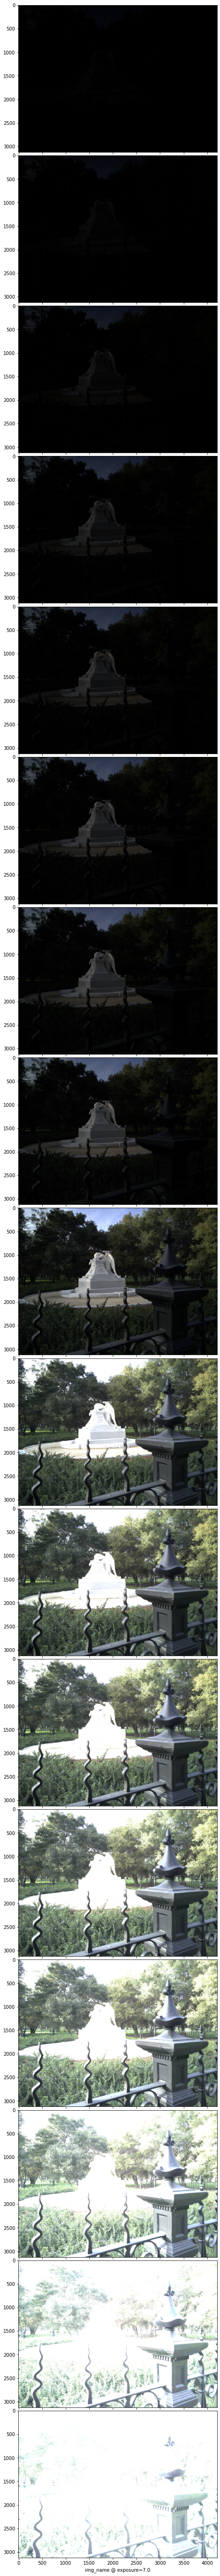

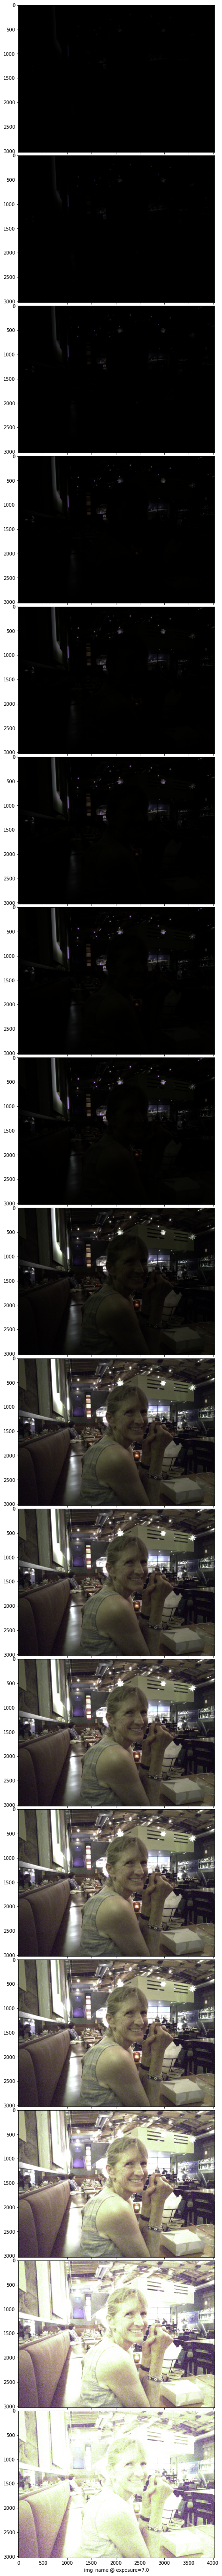

In [2]:
from dhdrnet.util import DATA_DIR
from dhdrnet.data_gen import  exposures_from_raw
from mpl_toolkits.axes_grid1 import ImageGrid

raw_dir = DATA_DIR / "dngs"
gt_dir = DATA_DIR / "merged"

ev_maximums = range(4, 8)
exposures = sorted(set(flatten(np.linspace(-ev, ev, 5) for ev in ev_maximums)))
print(exposures)

for raw_file in random_combination(raw_dir.iterdir(), 2):
    img_name = raw_file.stem
    gt_file = gt_dir / f"{img_name}.png"
    fig = plt.figure(figsize=(10,100))
    grid = ImageGrid(fig, 111, nrows_ncols=(len(exposures),1), axes_pad=0.1)
    for ax, (adjusted,exposure) in zip(grid,exposures_from_raw(raw_file, exposures)):
        ax.imshow(adjusted)
        ax.set_xlabel(f"img_name @ {exposure=}")
    plt.show()

In [25]:
store = pd.HDFStore('test_store.h5')
stats = pd.DataFrame(
    data=None,
    columns=["name", "metric","ev_a", "ev_b", "score"]
)

In [34]:
stats_dicts = [{
    "name": ["test_name", "test_na],
    "metric": ["mse", "ssim"],
    "ev_a": [1,1],
    "ev_b": [3.5,3.5],
    "score": [x,y]
} for (x,y) in chunked(np.random.rand(10), 2)]
                        
pd.DataFrame.from_dict(stats_dicts)

name       metric    ev_a        ev_b  \
0  [test_name, test_name]  [mse, ssim]  [1, 1]  [3.5, 3.5]   
1  [test_name, test_name]  [mse, ssim]  [1, 1]  [3.5, 3.5]   
2  [test_name, test_name]  [mse, ssim]  [1, 1]  [3.5, 3.5]   
3  [test_name, test_name]  [mse, ssim]  [1, 1]  [3.5, 3.5]   
4  [test_name, test_name]  [mse, ssim]  [1, 1]  [3.5, 3.5]   

                              score  
0  [0.571454219243, 0.590908081564]  
1    [0.105992244026, 0.3201551182]  
2   [0.75537038396, 0.230186074859]  
3  [0.891194583548, 0.646791217239]  
4  [0.13039449903, 0.0778948929924]